<a href="https://colab.research.google.com/github/datagirl98/Capstone2025/blob/main/Capstone_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Load the drive helper
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/healthcare_dataset.csv')
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


# **Exploratory Data Analysis (EDA)**

In [ ]:
# check dataset shape
print("rows and columns:",df.shape)

rows and columns: (55500, 15)


In [ ]:
# basic information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [6]:
# descriptive statistics
df.describe(include ='all')

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
count,55500,55500.000000,55500,55500,55500,55500,55500,55500,55500,55500.000000,55500.000000,55500,55500,55500,55500
unique,49992,NaN,2,8,6,1827,40341,39876,5,NaN,NaN,3,1856,5,3
top,DAvId muNoZ,NaN,Male,A-,Arthritis,2024-03-16,Michael Smith,LLC Smith,Cigna,NaN,NaN,Elective,2020-03-15,Lipitor,Abnormal
freq,3,NaN,27774,6969,9308,50,27,44,11249,NaN,NaN,18655,53,11140,18627
mean,NaN,51.539459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25539.316097,301.134829,NaN,NaN,NaN,NaN
std,NaN,19.602454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14211.454431,115.243069,NaN,NaN,NaN,NaN
min,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2008.492140,101.000000,NaN,NaN,NaN,NaN
25%,NaN,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13241.224652,202.000000,NaN,NaN,NaN,NaN
50%,NaN,52.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25538.069376,302.000000,NaN,NaN,NaN,NaN
75%,NaN,68.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37820.508436,401.000000,NaN,NaN,NaN,NaN


In [7]:
# checking for missing values
df.isnull().sum()

,0
Name,0
Age,0
Gender,0
Blood Type,0
Medical Condition,0
Date of Admission,0
Doctor,0
Hospital,0
Insurance Provider,0
Billing Amount,0


In [8]:
# Look at unique values per column (for categoricals)
df.nunique()

,0
Name,49992
Age,77
Gender,2
Blood Type,8
Medical Condition,6
Date of Admission,1827
Doctor,40341
Hospital,39876
Insurance Provider,5
Billing Amount,50000


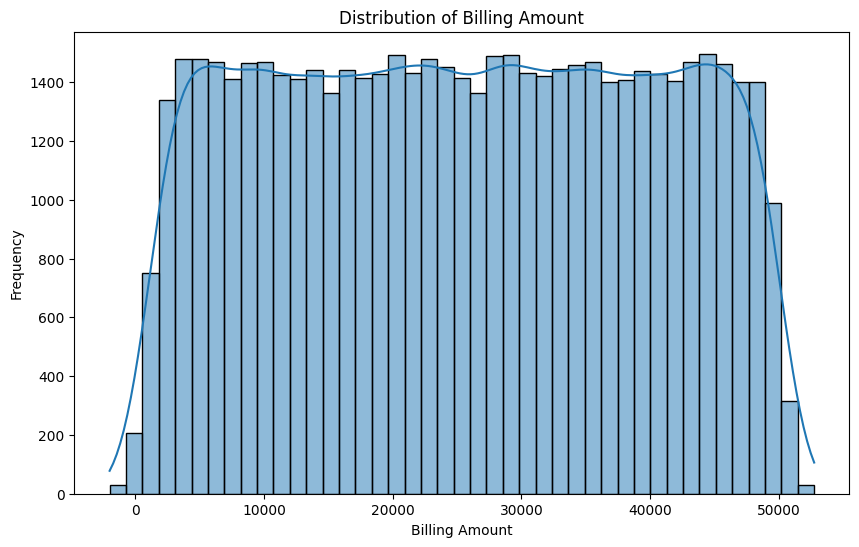

In [ ]:
# visualize the distribution of the target variable - in this case that is the billing amount
plt.figure(figsize=(10, 6))
sns.histplot(df['Billing Amount'], kde=True)
plt.title('Distribution of Billing Amount')
plt.xlabel('Billing Amount')
plt.ylabel('Frequency')
plt.show()


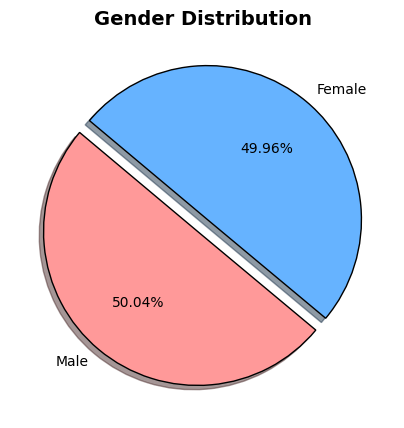

In [ ]:
# exploring gender breakdown
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']  # Custom pastel colors

# Create the pie chart
plt.figure(figsize=(5, 5))
df['Gender'].value_counts(sort=False).plot(
    kind='pie',
    autopct='%.2f%%',
    colors=colors,
    explode=[0.05] * df['Gender'].nunique(),  # Slightly separate slices
    shadow=True,
    startangle=140,  # Rotate for better visibility
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}  # Improve edges
)

# Add title
plt.title("Gender Distribution", fontsize=14, fontweight='bold')

# Display the chart
plt.ylabel('')  # Remove default y-label
plt.show()

In [ ]:
# exploring hospitals represented
df['Hospital'].value_counts()

,count
Hospital,
LLC Smith,44
Ltd Smith,39
Johnson PLC,38
Smith Ltd,37
Smith PLC,36
...,...
"and Montoya Flores, Boyer",1
"Carter and Dunn King,",1
"Hall, Brown Black and",1


In [ ]:
# Medical condition count
df['Medical Condition'].value_counts()

,count
Medical Condition,
Arthritis,9308
Diabetes,9304
Hypertension,9245
Obesity,9231
Cancer,9227
Asthma,9185


# **Cleaning the data**

In [ ]:
# checking for duplicate values
df.duplicated().sum()

534

In [ ]:
# removing duplicates
df = df.drop_duplicates()
df.head(2)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive


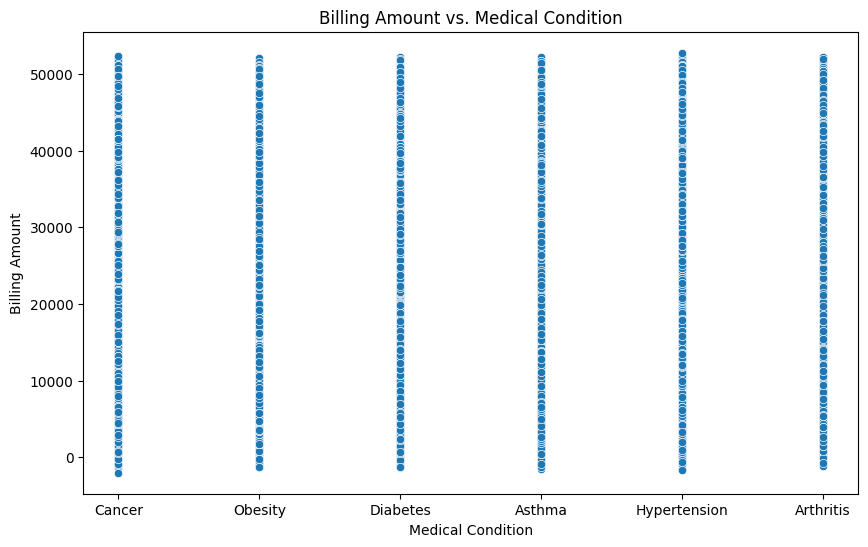

In [ ]:
# checking for outliers
plt.figure(figsize=(10, 6))

sns.scatterplot(x='Medical Condition', y='Billing Amount', data=df)

plt.title('Billing Amount vs. Medical Condition')

plt.xlabel('Medical Condition')

plt.ylabel('Billing Amount')

plt.show()

# **Data Modeling**

In [ ]:
for column in df.select_dtypes(include=['object']).columns:

  le = LabelEncoder()

  df[column] = le.fit_transform(df[column])

In [ ]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,3068,30,1,5,2,1729,26612,29933,1,18856.281306,328,2,1730,3,2
1,15211,62,1,0,5,104,33648,16012,3,33643.327287,265,1,109,1,1
2,6476,76,0,1,5,1233,37828,5473,0,27955.096079,205,1,1247,0,2
3,26935,28,0,6,3,560,22511,12317,3,37909.782410,450,0,589,1,0
4,26241,43,0,2,2,1230,21259,33598,0,14238.317814,458,2,1249,4,0


In [ ]:
numerical_cols = df.select_dtypes(include=['number']).columns

scaler = StandardScaler()

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [ ]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,-1.519961,-1.098824,0.999136,0.658348,-0.292010,1.552941,0.556494,0.924872,-0.715785,-0.470261,0.233120,1.222679,1.527229,0.708975,1.224795
1,-0.678428,0.533639,0.999136,-1.525364,1.464101,-1.520947,1.166657,-0.328019,0.702522,0.570250,-0.313556,0.001738,-1.538775,-0.706222,0.002423
2,-1.283780,1.247842,-1.000865,-1.088622,1.464101,0.614696,1.529147,-1.276530,-1.424939,0.169990,-0.834199,0.001738,0.613669,-1.413820,1.224795
3,0.134067,-1.200853,-1.000865,1.095090,0.293360,-0.658367,0.200854,-0.660570,0.702522,0.870465,1.291761,-1.219203,-0.630890,-0.706222,-1.219949
4,0.085972,-0.435636,-1.000865,-0.651879,-0.292010,0.609021,0.092281,1.254723,-1.424939,-0.795211,1.361180,1.222679,0.617452,1.416574,-1.219949


In [ ]:
# create correlation matrix
correlation_matrix = df[numerical_cols].corr()

fig = go.Figure(data=go.Heatmap(z=correlation_matrix.values,

                                x=correlation_matrix.columns,

                                y=correlation_matrix.index,

                                colorscale='Viridis',

                                text=np.around(correlation_matrix.values, decimals=2),

                                texttemplate="%{text}"))

fig.update_layout(title='Correlation Matrix of Numerical Features')

fig.show()

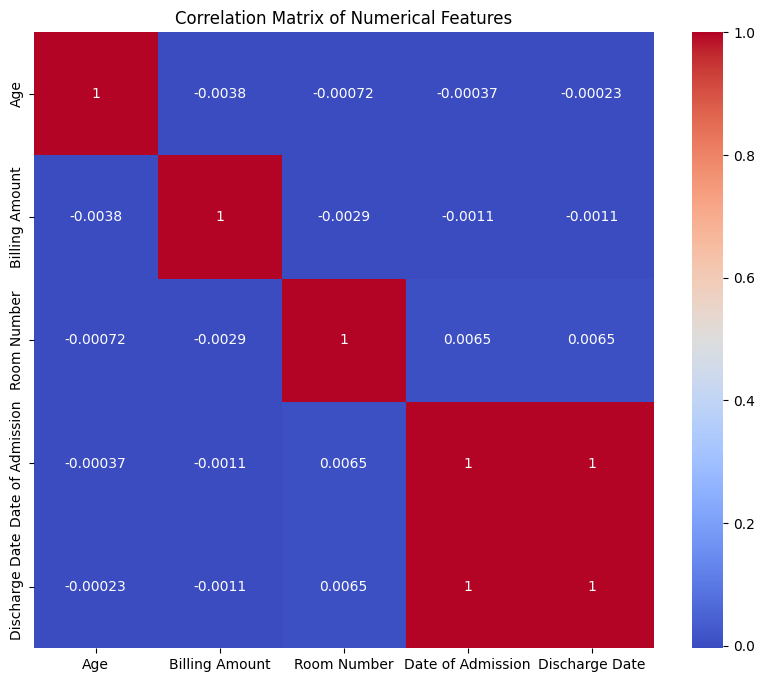

In [ ]:
# correlation matrix of numerical features
numerical_cols = ['Age', 'Billing Amount','Room Number', 'Date of Admission', 'Discharge Date']

correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.title('Correlation Matrix of Numerical Features')

plt.show()

In [ ]:
# separate test and train data

X = df.drop(columns=['Billing Amount'])

y = df['Billing Amount']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Elastic Net Regression': ElasticNet()
}

In [ ]:
# evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {'RMSE': rmse, 'R2': r2}
    print(f"{name}: RMSE = {rmse:.4f}, R2 = {r2:.4f}")

Linear Regression: RMSE = 0.9945, R2 = -0.0009
Ridge Regression: RMSE = 0.9945, R2 = -0.0009
Lasso Regression: RMSE = 0.9941, R2 = -0.0000
Elastic Net Regression: RMSE = 0.9941, R2 = -0.0000


Given the poor values of the regression models above. The next step is to build a full regression pipeline

In [11]:
# Drop identifiers and irrelevant columns if any
df = df.drop(columns=['Patient ID', 'Name', 'Room Number'], errors='ignore')

# Drop rows with missing billing amounts (or impute them)
df = df.dropna(subset=['Billing Amount'])


In [12]:
# Define features and target
X = df.drop(columns=['Billing Amount'])
y = df['Billing Amount']

In [13]:
# Identify column types
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [14]:
# Define the preprocessing steps
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

In [15]:
# Define the pipeline with Lasso (if results are not good swap in Ridge, ElasticNet, etc.)
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regressor', Lasso(alpha=0.1))
])

In [16]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train the model
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')